##    FLIGHT PRICE PREDICTION

#### Problem Statement
- Flight ticket prices can be something that is  hard to guess, today we might see a price, check out the price of the same flight tomorrow, it will be a different story. 
- We might have often heard travelers saying that flight ticket prices are so unpredictable. 
- That’s why we will try to use machine learning to solve this problem. 
- This can help airlines by predicting what prices they can maintain. 


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

**Loading the Flight Fare Data**

In [2]:
df=pd.read_excel(r"F:\PROJECT FILES AND DESCRIPTION\project dataset\Flight_Fare.xlsx")
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


**Inspection of the data**

In [3]:
df.shape

(10683, 11)

**Summary of the dataset**

In [4]:
df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


**Informatiion about the data and its datatypes**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [6]:
df.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

**Checking if there is any null values**

In [7]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

**In the whole data set there is only 2 null values each in Route and Total_stops, with the 10683 rows we can drop the two null values, it doesnt create any major difference in final output**

In [8]:
df.dropna(inplace=True)

### Exploratory Data Analysis(EDA)

**Preferred Airlines among the passangers**

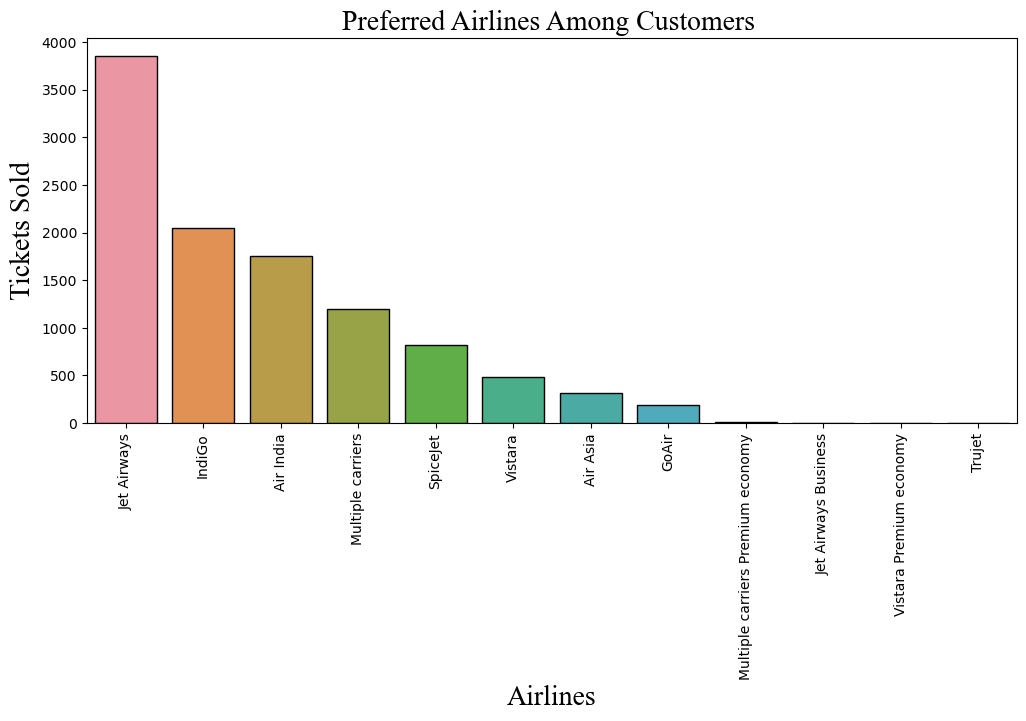

In [9]:
plt.figure(figsize=(12,5))
sns.countplot(x='Airline',data=df,order=df['Airline'].value_counts().index,ec='black')
font_style={'family':'times new roman','size':20,'color':'black'}
plt.title('Preferred Airlines Among Customers ',fontdict=font_style)
plt.xlabel('Airlines',fontdict=font_style)
plt.ylabel('Tickets Sold',fontdict=font_style)
plt.xticks(rotation=90)
plt.show()

**Most Preferred Airline among people is 'Jet Airways'.
Indigo is the second most preferred with Air india as the third most 
Preferred**

### Airlines vs ticket price

In [10]:
airlines=df.groupby('Airline').Price.max()
airlines_df=airlines.to_frame().sort_values('Price',ascending=False)[0:10]
airlines_df

,Price
Airline,
Jet Airways Business,79512
Jet Airways,54826
Multiple carriers,36983
Air India,31945
SpiceJet,23267
GoAir,22794
IndiGo,22153
Vistara,21730
Multiple carriers Premium economy,14629


In [11]:
airlines=df.groupby('Airline').Price.min()
airlines_df_min=airlines.to_frame().sort_values('Price',ascending=True)[0:10]
airlines_df_min

,Price
Airline,
SpiceJet,1759
Jet Airways,1840
Air India,2050
IndiGo,2227
Air Asia,3383
GoAir,3398
Vistara,3687
Trujet,4140
Multiple carriers,5797


**Costliest Flight Ticket**

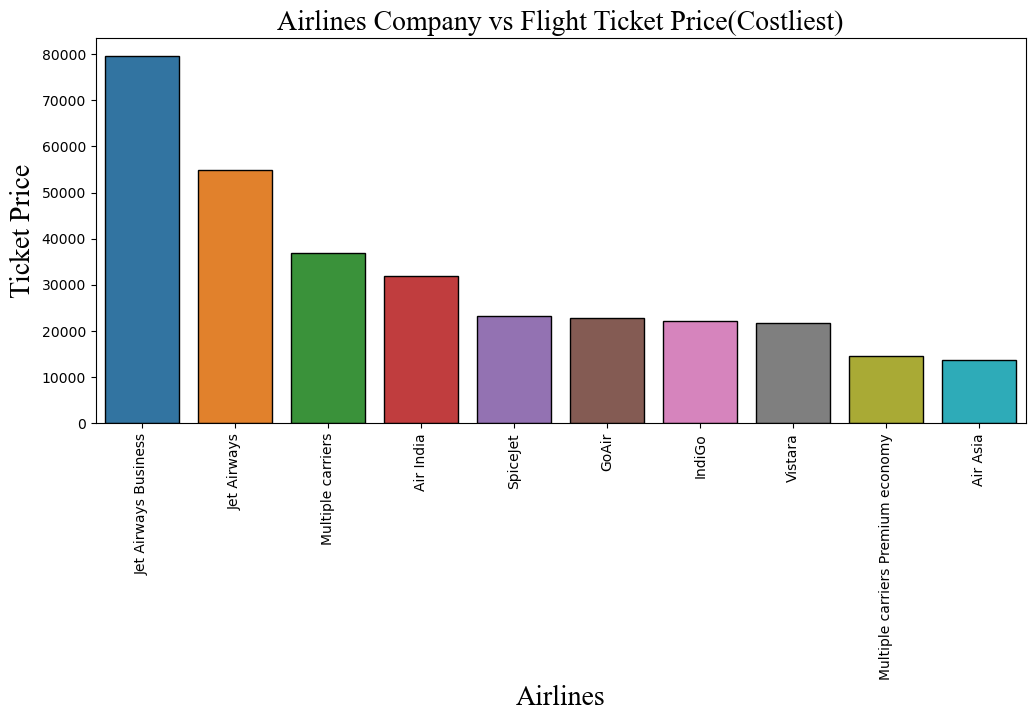

In [12]:
plt.subplots(figsize=(12,5))
sns.barplot(x=airlines_df.index, y=airlines_df["Price"],ec = "black")
font_style={'family':'times new roman','size':20,'color':'black'}
plt.title("Airlines Company vs Flight Ticket Price(Costliest)",fontdict=font_style )
plt.ylabel("Ticket Price", fontdict=font_style)
plt.xlabel("Airlines", fontdict=font_style)
plt.xticks(rotation=90)
plt.show()

**Lowest Ticket Price**

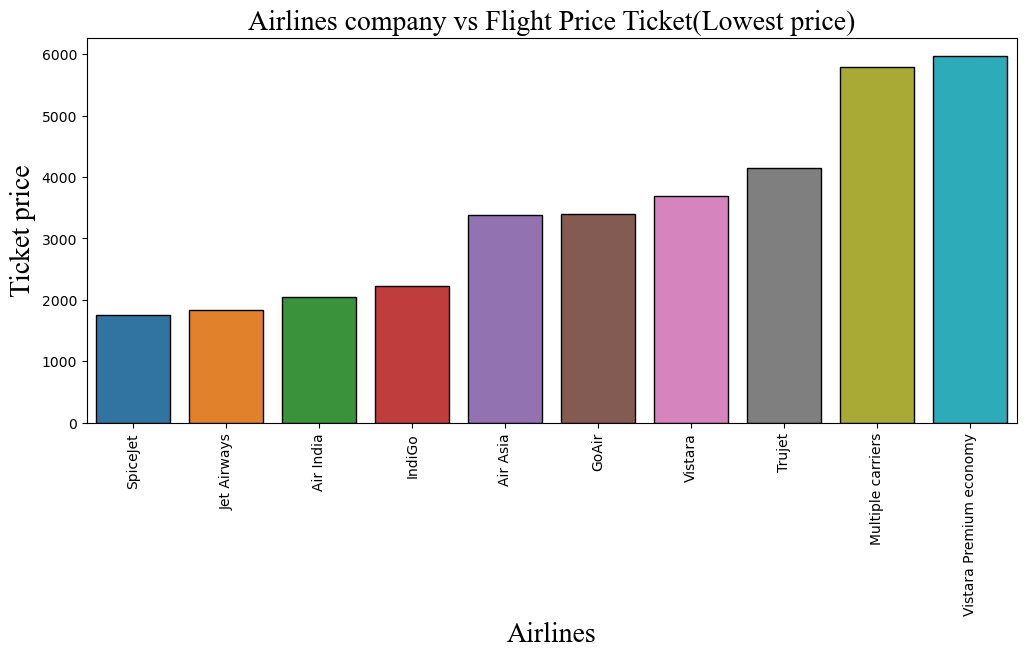

In [13]:
plt.subplots(figsize=(12,5))
sns.barplot(x=airlines_df_min.index,y=airlines_df_min['Price'],ec='black')
font_style={'family':'times new roman','size':20,'color':'black'}
plt.title('Airlines company vs Flight Price Ticket(Lowest price)',fontdict=font_style)
plt.xlabel('Airlines',fontdict=font_style)
plt.ylabel('Ticket price',fontdict=font_style)
plt.xticks(rotation=90)
plt.show()

- Jetairways buisness class is the costliest ticket among all 
- Spicejet with the lowest ticket cost among all

**Price on weekdays vs weekends**

In [14]:
days_df=df[['Airline','Date_of_Journey','Price']].copy()
days_df.head()

,Airline,Date_of_Journey,Price
0,IndiGo,24/03/2019,3897
1,Air India,1/05/2019,7662
2,Jet Airways,9/06/2019,13882
3,IndiGo,12/05/2019,6218
4,IndiGo,01/03/2019,13302


In [15]:
days_df['Date_of_Journey'] = pd.to_datetime(days_df['Date_of_Journey'],format='%d/%m/%Y')
days_df['Weekday'] = days_df['Date_of_Journey'].dt.day_name()
days_df['Weekend'] = days_df['Weekday'].apply(lambda day: 1 if day == 'Sunday'or day=='Saturday' else 0)
days_df.head(20)

,Airline,Date_of_Journey,Price,Weekday,Weekend
0,IndiGo,2019-03-24,3897,Sunday,1
1,Air India,2019-05-01,7662,Wednesday,0
2,Jet Airways,2019-06-09,13882,Sunday,1
3,IndiGo,2019-05-12,6218,Sunday,1
4,IndiGo,2019-03-01,13302,Friday,0
5,SpiceJet,2019-06-24,3873,Monday,0
6,Jet Airways,2019-03-12,11087,Tuesday,0
7,Jet Airways,2019-03-01,22270,Friday,0
8,Jet Airways,2019-03-12,11087,Tuesday,0
9,Multiple carriers,2019-05-27,8625,Monday,0


**Plotting the price difference on weekdays and weekends**

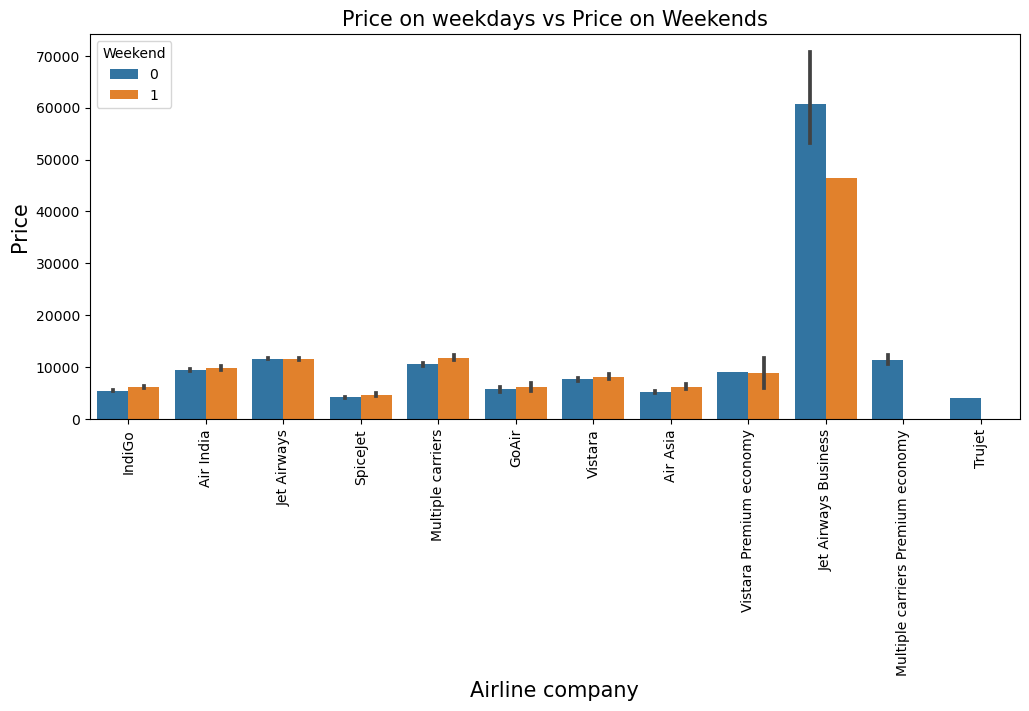

In [16]:
plt.subplots(figsize=(12,5))
sns.barplot(x='Airline',y='Price',data=days_df,hue='Weekend')
plt.xlabel('Airline company',size=15)
plt.ylabel('Price',size=15)
plt.title('Price on weekdays vs Price on Weekends',size=15)
plt.legend(title='Weekend'.title())
plt.xticks(rotation=90)
plt.show()

**We can also find the highest price of the ticket with a function**

In [17]:
def find_high_price_days(days_df):
    weekday = days_df['Weekend'] == 0
    average_price_by_day = days_df.groupby(weekday)['Price'].mean()
    
    # Find the days with the highest average ticket prices
    highest_price_days = average_price_by_day[average_price_by_day == average_price_by_day.max()]
    
    # Determine if the highest prices are on weekdays, weekends, or both
    if highest_price_days.index.all():
        return "The highest ticket prices are on weekdays."
    elif not highest_price_days.index.any():
        return "The highest ticket prices are on weekends."
    else:
        return "The highest ticket prices are on both weekdays and weekends."


high_price_info = find_high_price_days(days_df)
print(high_price_info)


The highest ticket prices are on weekends.


## FEATURE ENGINEERING

- Extracting the day,month and year from Date_of_journey and store them in new columns 
- In this way we can convert the object data type into int

**With the help of datetime we can extract the date and time separately**

In [18]:
df["Journey_day"]=pd.to_datetime(df.Date_of_Journey,format="%d/%m/%Y").dt.day

In [19]:
df["Journey_month"]=pd.to_datetime(df.Date_of_Journey,format='%d/%m/%Y').dt.month

In [20]:
df['Journey_year']=pd.to_datetime(df.Date_of_Journey,format='%d/%m/%Y').dt.year

In [21]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,2019


In [22]:
# Now we extracted the data from Date_of_Journey we can drop this column
df=df.drop(['Date_of_Journey'],axis=1)

In [23]:
df.Journey_year.value_counts()

2019    10682
Name: Journey_year, dtype: int64

In [24]:
# The Journey_year column has the same value so we can also drop this column this doesnt create any difference in the end
df=df.drop(['Journey_year'],axis=1)
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [25]:
df.Total_Stops.value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [26]:
# Total_stops is Ordinal data so we can perform LabelEncoder
df=df.replace({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4})

In [27]:
# extracting hours and min from arrivasl time and Departute time
#Arrival Time
df['Arrival_Time']=df['Arrival_Time'].str.split(" ").str[0]
df['Arrival_hour']=df['Arrival_Time'].str.split(":").str[0].astype(int)
df['Arrival|_min']=df['Arrival_Time'].str.split(":").str[1].astype(int)

In [28]:
# we extracted the data from the Arrival_time so we can drop the Arrival_Time column
df=df.drop(['Arrival_Time'],axis=1)

In [29]:
#Dep_Time
df['Dep_hour']=df['Dep_Time'].str.split(":").str[0].astype(int)
df['Dep_min']=df['Dep_Time'].str.split(':').str[1].astype(int)

In [30]:
# we extracted the data from the Dep_time so we can drop the Dep_Time column
df=df.drop(['Dep_Time'],axis=1)

In [31]:
# Time taken by plane to reach destination is called Duration
# It is the differnce betwwen Departure Time and Arrival time


# Assigning and converting Duration column into list
duration = list(df["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

In [32]:
#  Adding duration_hours and duraton_mins 
df["Duration_hr"]=duration_hours
df['Duration_min']=duration_mins

**Duration column**

- Extract hours and min from Duration feature.
- Convert hours to min and find total duration in minutes to make it a single column.

In [33]:
df["Duration_hr"]=df["Duration"].str.split('h').str[0]
df['Duration_hr'].str.contains('m').sum()

1

In [34]:
df[df['Duration_hr'].str.contains('m')]

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Arrival_hour,Arrival|_min,Dep_hour,Dep_min,Duration_hr,Duration_min
6474,Air India,Mumbai,Hyderabad,BOM → GOI → PNQ → HYD,5m,2,No info,17327,6,3,16,55,16,50,5m,5


In [35]:
df["Duration_hr"]=df["Duration_hr"].replace("5m","0")

In [36]:
df["Duration"]=(df["Duration_hr"].astype(int)*60) + df["Duration_min"].astype(int)

In [37]:
df=df.drop(['Duration_hr','Duration_min'],axis=1)
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Arrival_hour,Arrival|_min,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,170,0,No info,3897,24,3,1,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,445,2,No info,7662,1,5,13,15,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,1140,2,No info,13882,9,6,4,25,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,325,1,No info,6218,12,5,23,30,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,285,1,No info,13302,1,3,21,35,16,50


In [38]:
df=df.drop(['Route','Additional_Info'],axis=1)

### Using Encoding to Handle Categorical Data

**Features with Categorical Data**

In [39]:
from sklearn.preprocessing import LabelEncoder
la=LabelEncoder()

In [40]:
for i in ['Airline','Source','Destination']:
    df[i]=la.fit_transform(df[i])
df.head()

,Airline,Source,Destination,Duration,Total_Stops,Price,Journey_day,Journey_month,Arrival_hour,Arrival|_min,Dep_hour,Dep_min
0,3,0,5,170,0,3897,24,3,1,10,22,20
1,1,3,0,445,2,7662,1,5,13,15,5,50
2,4,2,1,1140,2,13882,9,6,4,25,9,25
3,3,3,0,325,1,6218,12,5,23,30,18,5
4,3,0,5,285,1,13302,1,3,21,35,16,50


###### Route column

- The route column tells about the journey's path.
- Route column can be removed because 'Total_Stops' field has alreadycaptured this value and both are related.        


**'Additional_Info' column can be dropped since more than 70% of them have no information.**

**Checking for corelation between the features via heatmap**

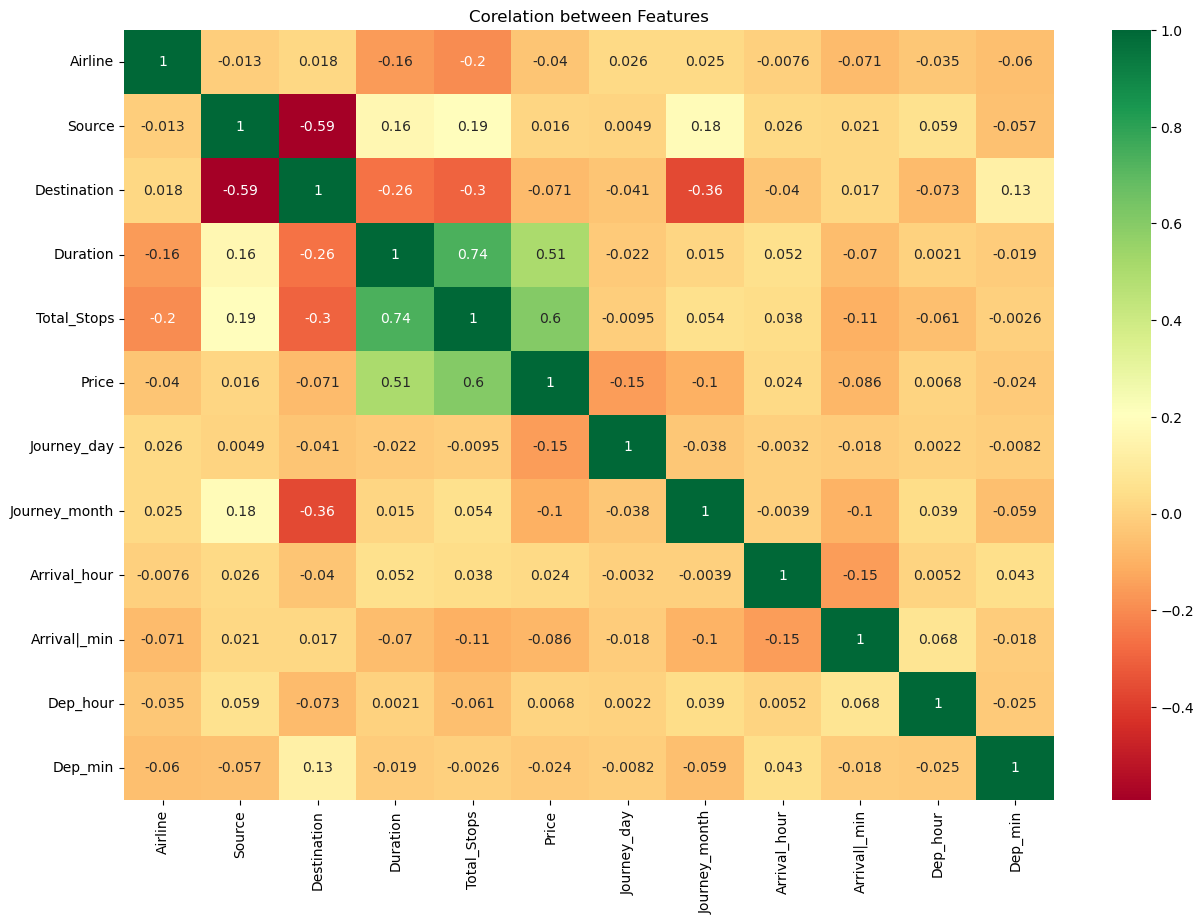

In [41]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),cmap='RdYlGn',annot=True)
plt.title('Corelation between Features')
plt.show()

##### There is a high corelation between:

- Price & total_stops
- Price & duration of the flight
- Duration & Total_stops

There is no-corelation between Source & destination

**Comparing the accuracies got from these 3 models and hyperparameter tuning for that ML Algorithm to improve its efficiency**

In [42]:
# splitting ths data into training data and testing data
x=df.drop(['Price'],axis=1)
y=df.Price

In [43]:
x

,Airline,Source,Destination,Duration,Total_Stops,Journey_day,Journey_month,Arrival_hour,Arrival|_min,Dep_hour,Dep_min
0,3,0,5,170,0,24,3,1,10,22,20
1,1,3,0,445,2,1,5,13,15,5,50
2,4,2,1,1140,2,9,6,4,25,9,25
3,3,3,0,325,1,12,5,23,30,18,5
4,3,0,5,285,1,1,3,21,35,16,50
...,...,...,...,...,...,...,...,...,...,...,...
10678,0,3,0,150,0,9,4,22,25,19,55
10679,1,3,0,155,0,27,4,23,20,20,45
10680,4,0,2,180,0,27,4,11,20,8,20
10681,10,0,5,160,0,1,3,14,10,11,30


In [44]:
y

0         3897
1         7662
2        13882
3         6218
4        13302
         ...  
10678     4107
10679     4145
10680     7229
10681    12648
10682    11753
Name: Price, Length: 10682, dtype: int64

**Spliting the data into training data and testing data**

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [47]:
x_train

,Airline,Source,Destination,Duration,Total_Stops,Journey_day,Journey_month,Arrival_hour,Arrival|_min,Dep_hour,Dep_min
752,3,2,1,300,1,27,5,21,0,16,0
7430,3,3,0,155,0,6,3,17,45,15,10
5478,4,3,0,1495,1,12,6,19,50,18,55
3445,4,2,1,1015,1,6,6,4,25,11,30
9126,4,2,1,450,1,9,5,4,25,20,55
...,...,...,...,...,...,...,...,...,...,...,...
5734,4,2,1,1165,1,27,3,4,25,9,0
5191,4,3,0,400,1,9,5,20,45,14,5
5390,6,2,1,760,1,15,5,1,30,12,50
860,3,0,5,165,0,3,3,3,25,0,40


In [48]:
x_test

,Airline,Source,Destination,Duration,Total_Stops,Journey_day,Journey_month,Arrival_hour,Arrival|_min,Dep_hour,Dep_min
6075,6,2,1,625,2,21,5,1,30,15,5
3544,2,2,1,540,1,3,6,19,35,10,35
9291,10,3,0,765,1,9,5,9,5,20,20
5032,3,1,4,140,0,24,5,17,5,14,45
2483,4,2,1,335,1,21,5,4,25,22,50
...,...,...,...,...,...,...,...,...,...,...,...
3022,4,0,5,365,1,18,3,23,0,16,55
8416,1,2,1,1420,2,3,3,9,25,9,45
2605,3,0,2,170,0,21,6,3,15,0,25
1392,6,2,1,465,1,27,6,1,30,17,45


In [49]:
y_train

752      5054
7430     5618
5478    13044
3445    14714
9126    12373
        ...  
5734    12242
5191    10844
5390     7670
860      6144
7270    10262
Name: Price, Length: 8011, dtype: int64

In [50]:
y_test

6075    16655
3544     4959
9291     9187
5032     3858
2483    12898
        ...  
3022    13555
8416    12760
2605     3419
1392     5797
8535     6818
Name: Price, Length: 2671, dtype: int64

### Importing the models

In [51]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

- The project focuses on predicting future flight prices using historical data. 
- We selected KNeighborsRegressor, DecisionTreeRegressor, and RandomForestRegressor algorithms for their capabilities in regression tasks, non-linear relationship handling. 
- The predictive model aims to assist customers in planning their journeys based on accurate price predictions.
- That's why i continued with the models on the firsthand

**Creating a function to train the models with testing and training data**
- Creating a function to train the model saves lot of time and to automate the training and testing process of the ML model

In [52]:
def predict(algorithm):
    print('Algorithm:',algorithm)
    model=algorithm.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    print("The predicted Price Values are :",y_pred)
    print('\n')
    r2=r2_score(y_test,y_pred)
    print('r2_score:',r2)
    print('MAE:',(mean_absolute_error(y_test,y_pred)))
    print('MSE:',(mean_squared_error(y_test,y_pred)))
    print('RMSE:',(np.sqrt(mean_squared_error(y_test,y_pred))))
    return r2

**KNeighborsRegressor**

In [53]:
knn=predict(KNeighborsRegressor())

Algorithm: KNeighborsRegressor()
The predicted Price Values are : [16315.   5158.2  8536.  ...  3653.4 11656.4  9908.4]


r2_score: 0.5551976104541892
MAE: 1835.9627105952827
MSE: 9168723.406754024
RMSE: 3027.989994493711


**DecisionTreeRegressor**

In [54]:
dt=predict(DecisionTreeRegressor())

Algorithm: DecisionTreeRegressor()
The predicted Price Values are : [16840.  4959.  9397. ...  3419.  5797.  6818.]


r2_score: 0.6026295106654528
MAE: 1402.12582678148
MSE: 8191008.394615936
RMSE: 2861.993779625654


**RandomForestRegressor**

In [55]:
rf=predict(RandomForestRegressor())

Algorithm: RandomForestRegressor()
The predicted Price Values are : [16750.31  5428.29  8811.29 ...  3480.27  6421.13  6879.77]


r2_score: 0.8064802355791537
MAE: 1159.5291138891994
MSE: 3989028.016523723
RMSE: 1997.2551205401185


**Storing the accuracies of these 3 models in a dataframe** 

In [56]:
df_score=pd.DataFrame({'Model':['K-Nearest Neighbour','Decision Tree','Random Foret'],'Accuracy':[knn*100,dt*100,rf*100]})
df_score

,Model,Accuracy
0,K-Nearest Neighbour,55.519761
1,Decision Tree,60.262951
2,Random Foret,80.648024


- The Random Forest Regresor Model turned out to be the most accurate one out of these 3 models
- we can improve it by Hyperparameter Tuning

### Hyperparameter Tuning

In [57]:
from sklearn.model_selection import RandomizedSearchCV
random_search = {'n_estimators' : [100, 120, 150, 180, 200,220,250],
                 'max_features':['auto','sqrt'],
                 'max_depth':[5,10,15,20],
                 'min_samples_split' : [2, 5, 10, 15, 100],
                 'min_samples_leaf' : [1, 2, 5, 10]}
rf_regressor=RandomForestRegressor()
rf_model=RandomizedSearchCV(estimator=rf_regressor,param_distributions=random_search,
                            cv=3,n_jobs=-1,verbose=2,random_state=0)
rf_model.fit(x_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [5, 10, 15, 20],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 120, 150, 180,
                                                         200, 220, 250]},
                   random_state=0, verbose=2)

**Getting the best_params**

In [58]:
rf_model.best_params_

{'n_estimators': 220,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 15}

In [64]:
random_search = {'n_estimators' : [220],
                 'max_features':['auto','sqrt'],
                 'max_depth':[15],
                 'min_samples_split' : [2],
                 'min_samples_leaf' : [2]}
rf_regressor=RandomForestRegressor()
rf_model=RandomizedSearchCV(estimator=rf_regressor,param_distributions=random_search,
                            cv=3,n_jobs=-1,verbose=2,random_state=0)
rf_model.fit(x_train,y_train)

C:\Users\THENDRAL\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:292: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 3 folds for each of 2 candidates, totalling 6 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [15],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [2],
                                        'min_samples_split': [2],
                                        'n_estimators': [220]},
                   random_state=0, verbose=2)

In [65]:
# predicting the  values
pred=rf_model.predict(x_test)
r2_score(y_test,pred)

0.8212015148209404

In [66]:
print('r2_score:',r2_score(y_test,pred))
print('MAE:', mean_absolute_error(y_test, pred))
print('MSE:', mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, pred)))

r2_score: 0.8212015148209404
MAE: 1119.2937274261892
MSE: 3685577.898597523
RMSE: 1919.7858991558207


- After HyperparameterTuning R2 score increases 
- MAE & MSE decreases, it indicates that we are successfull in tuning our model

- From Random Forest regressor for training the model and improved its accuracy by doing Hyperparqameter tuning
- We have trained our Random Forest Regresion model, to forecast the fares of flight prices, with an R2 score 0f 82%

### Saving the model in Pickle format

In [67]:
import pickle
file=open('flight_pred1.2.pkl','wb')
pickle.dump(rf_model,file)

In [68]:
model=open('flight_pred1.2.pkl','rb')
random_forest=pickle.load(model)

In [69]:
result=random_forest.predict(x_test)
print("The predicted prices are",result)
print("r2 score = ",r2_score(y_test,result))

The predicted prices are [16647.29296717  5189.41192641  8663.52072454 ...  3796.08464749
  6750.70242923  6825.71559243]
r2 score =  0.8212015148209404


### Analysis 
   The project aimed to predict future flight prices using machine learning models. Three regression models, including K-Nearest Neighbors (KNN), Decision Tree (DT), and Random Forest (RF), were evaluated using evaluation metrics such as R2 score, MAE, MSE, and RMSE. The hyperparameter-tuned Random Forest (HT RF) outperformed the other models, achieving the highest accuracy and the lowest prediction errors, making it the recommended model for flight price prediction. Further improvements can be made by exploring real-time data, user preferences, Ensemble methods, Specific models for specific regions, Seasonal(holidays)and time-specific data, Dynamic pricing, Human-in-loop, and User Input on specific needs to enhance model accuracy and user experience.


## Conclusion:

- We have used random forest regressor for training the model and improved its accuracy by doing hyperparameter tuning.
- As a result, we have trained our Random Forest Regression model, to forecast fares of flight tickets, with an R2 score of 80 %.
- After Hyperparametertuning, we get R2 score of 82% for Random Forest Regression model.
- We can implement the model into production to predict the fuure price of the tickets


### Model Comparison Report: Predicting Flight Prices

1. **Introduction**:
   - Problem Statement: The objective of this study is to predict future flight prices to help customers plan their journeys effectively.
   
2. **Dataset Information**:
   - The dataset contains historical flight price data for the year 2019.
   - Number of Samples: 10682
   - Number of Features: 11
   - Target Variable: Flight Prices


3. **Model Selection**:
   - KNeighborsRegressor
   - DecisionTreeRegressor
   - RandomForestRegressor

4. **Model Evaluation Metrics**:
   - Mean Absolute Error (MAE)
   - Mean Squared Error (MSE)
   - Root Mean Squared Error (RMSE)

5.**Results**:
   - Model 1 (**KNeighborsRegressor**):
     - MAE: 1835.9627105952827
     - MSE: 8007983.122980159
     - RMSE: 3027.989994493711
     - r2_score:0.5551976104541892

        
   - Model 2 (**DecisionTreeRegressor**):
     - MAE:1402.12582678148
     - MSE:8191008.394615936
     - RMSE: : 2261.7228600660496
     - r2_score: 2861.993779625654

        
   - Model 3 (**RandomForestRegressor**):
     - MAE: 1159.5291138891994
     - MSE 3989028.016523723
     - RMSE:1997.2551205401185
     - r2_score: 0.8064802355791537
     
6. **Hyper parameter Tuning**(**RandomForestRegressor**):
     - MAE: 1119.2937274261892
     - MSE:3685577.898597523
     - RMSE: 1919.7858991558207
     - r2_score: 0.8212015148209404

7.**Future Improvements:** 
   - Real-time data
   - Ensemble methods
   - Specific models for specific regions
   - Seasonal(holidays)and time-specific data
   - Dynamic pricing
   - Human-in-loop
   - User Input on specific Needs          
    

8. **Conclusion**:
   - Based on the evaluation results, the RandomForestRegressor is recommended for predicting flight prices.
  
   - Limitations: 
         - Data Availability and Quality
         - Assumptions and Simplifications
         - Dynamic Nature of Airline Industry 
         - Geographical Variability
         - Overfitting or Underfitting

   




### Challenges Faced In the Project

- **Data from a specific time-period and specific regions:**
   - This dataset contains only 2019 flight data,this may result in incorrect prediction for the future data
   - This dataset contains only for 6 or 7 seven major cities in India, so predicting the prices for other cities in india cannot be possible(or) in correct predictions
- **Lot of work in the Feature Engineering**
    - I have to extract data from the existing features and converting them into new features 
    - Once we extracted the new data from the old features we have to drop the old features because the new data represents the old feature.This has to be done correctly or there will be incorrect data.
- **Outlier detection**
     - Flight frices are quite tricky to predict,they can be  so low with a discounted price or economy class and can be so high with premimum class  tickets
     - So,i didnt do any outlier detection and outlier removal .
- **Model Selection**
     - Flight prices are continuous numerical values that can take a wide range of numeric values. In regression, the target variable is continuous, and the goal is to predict a numerical value.On the other hand, classifier represents discrete categories likes("Yes"or"No","High"","Medium"or"Low").
     - Using a regressor allows us to measure the accuracy of predictions using common regression evaluation metrics like Mean Absolute Error (MAE), Mean Squared Error (MSE), and Root Mean Squared Error (RMSE).
- **Domain knowledge:**
   - I know only a little about the airline, there are so much factors detemine the prices of the airline ticket.
        - Type of ticket:
             - Economy
             - Premium Economy
             - Buisness Class
             - First Class
        - Total Stops
        - Route
        - Duration
        - Airline 

   - In this project there is only a limited amount of data for a specific region, so grasping the data is not that tough but having data from all over the world can be quite tricky.
